In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


songs_2010=pd.read_csv('2010.csv')
songs_2000=pd.read_csv('2000.csv')
songs_1990=pd.read_csv('1990.csv')
songs_1980=pd.read_csv('1980.csv')
songs_1970=pd.read_csv('1970.csv')
songs_1960=pd.read_csv('1960.csv')

allsongs=pd.concat([songs_2010,songs_2000,songs_1990,songs_1980,songs_1970,songs_1960],axis=0, ignore_index=True)


features=['bpm','nrgy','dnce']
info=allsongs.dropna(subset=features)

data=info[features].copy()

data



,bpm,nrgy,dnce
0,135,43,70
1,140,32,78
2,136,62,88
3,117,55,76
4,160,52,59
...,...,...,...
589,130,66,51
590,73,41,39
591,114,77,68
592,129,68,49


In [2]:

data = (data - data.min()) / (data.max() - data.min())


In [3]:
data.describe()


,bpm,nrgy,dnce
count,594.000000,594.000000,594.000000
mean,0.424095,0.623952,0.545632
std,0.178703,0.211470,0.193806
min,0.000000,0.000000,0.000000
25%,0.301095,0.470745,0.421053
50%,0.423358,0.648936,0.565789
75%,0.525547,0.787234,0.684211
max,1.000000,1.000000,1.000000


In [4]:
def random_centroids(data,k):
    centroids=[]
    for i in range(k):
        centroid=data.apply(lambda x:float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [5]:
centroids=random_centroids(data,5)


In [6]:
centroids

,0,1,2,3,4
bpm,0.452555,0.430657,0.379562,0.525547,0.459854
nrgy,0.255319,0.351064,0.468085,0.744681,0.414894
dnce,0.263158,0.736842,0.421053,0.631579,0.697368


In [7]:
def get_lables(data,centroids):
    distances=centroids.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)


In [8]:
labels=get_lables(data,centroids)

In [9]:
labels.value_counts()

3    292
2    148
4     68
0     51
1     35
dtype: int64

In [10]:
def new_centroids(data,labels,k):
    centroids=data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [11]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [12]:
def plot_clusters(data,labels,centroids,iterations):
    pca=PCA(n_components=2)
    data_2d=pca.fit_transform(data)
    centroids_2d=pca.fit_transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'iteration:{iteration}')
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
    plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,0])
    plt.show()
    

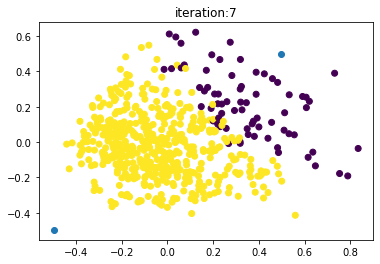

In [14]:
max_iterations=100
k=2
centroids=random_centroids(data,k)
old_centroids=pd.DataFrame()
iteration=1

while iteration<max_iterations and not centroids.equals(old_centroids):
    old_centroids=centroids
    labels=get_lables(data,centroids)
    centroids=new_centroids(data,labels,k)
    plot_clusters(data,labels,centroids,iteration)
    iteration+=1
    